<a href="https://colab.research.google.com/github/Rashu0304/Supervised-Learning-Project---Portugal-Bank-Marketing-Dataset/blob/main/PART_1_Portugal_Bank_Marketing_Campaign_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ML & DL EXAM SOLUTIONS

### Part 1- Supervised Learning

# Portugal Bank Marketing Campaign Analysis

## Objectives:
To analyze the Portugal Bank Marketing dataset and predict customer subscription to term deposits using supervised learning models like Logistic Regression and Decision Tree, while optimizing performance through data preprocessing and hyperparameter tuning.

## Importing libraries


In [ ]:
    import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load and Inspect the Data

In [ ]:
# Load the dataset
df = pd.read_csv(r"C:\Users\user\Downloads\bank.csv",sep=";")

# Display the first few rows
print(df.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [ ]:
# Summary of the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
# Check for missing values
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [ ]:
print(df.describe(include='all'))

               age          job       marital     education       default  \
count  41188.00000  41188.00000  41188.000000  41188.000000  41188.000000   
mean      40.02406      3.72458      1.172769      3.747184      0.208872   
std       10.42125      3.59456      0.608902      2.136482      0.406686   
min       17.00000      0.00000      0.000000      0.000000      0.000000   
25%       32.00000      0.00000      1.000000      2.000000      0.000000   
50%       38.00000      2.00000      1.000000      3.000000      0.000000   
75%       47.00000      7.00000      2.000000      6.000000      0.000000   
max       98.00000     11.00000      3.000000      7.000000      2.000000   

            housing          loan       contact         month   day_of_week  \
count  41188.000000  41188.000000  41188.000000  41188.000000  41188.000000   
mean       1.071720      0.327425      0.365252      4.230868      2.004613   
std        0.985314      0.723616      0.481507      2.320025      1.

In [ ]:
#Check values and their count in the columns
for col in df.columns:
    print("---------------{}------------------".format(col))
    print(df[col].value_counts())
    print()

---------------age------------------
age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: count, Length: 78, dtype: int64

---------------job------------------
job
0     10422
1      9254
9      6743
7      3969
4      2924
5      1720
2      1456
6      1421
3      1060
10     1014
8       875
11      330
Name: count, dtype: int64

---------------marital------------------
marital
1    24928
2    11568
0     4612
3       80
Name: count, dtype: int64

---------------education------------------
education
6    12168
3     9515
2     6045
5     5243
0     4176
1     2292
7     1731
4       18
Name: count, dtype: int64

---------------default------------------
default
0    32588
1     8597
2        3
Name: count, dtype: int64

---------------housing------------------
housing
2    21576
0    18622
1      990
Name: count, dtype: int64

---------------loan------------------
loan
0    33950
2     6248
1      990
Name:

#
The dataset contains 41,188 records and 21 columns. No null values are present based on the given info() output. Key features such as age, campaign, and duration have wide ranges, needing analysis for scaling and outliers.

## 1: Exploratory Data Analysis (EDA)

                     age  duration  campaign     pdays  previous  \
age             1.000000 -0.000866  0.004594 -0.034369  0.024365   
duration       -0.000866  1.000000 -0.071699 -0.047577  0.020640   
campaign        0.004594 -0.071699  1.000000  0.052584 -0.079141   
pdays          -0.034369 -0.047577  0.052584  1.000000 -0.587514   
previous        0.024365  0.020640 -0.079141 -0.587514  1.000000   
emp.var.rate   -0.000371 -0.027968  0.150754  0.271004 -0.420489   
cons.price.idx  0.000857  0.005312  0.127836  0.078889 -0.203130   
cons.conf.idx   0.129372 -0.008173 -0.013733 -0.091342 -0.050936   
euribor3m       0.010767 -0.032897  0.135133  0.296899 -0.454494   
nr.employed    -0.017725 -0.044703  0.144095  0.372605 -0.501333   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.000371        0.000857       0.129372   0.010767   
duration           -0.027968        0.005312      -0.008173  -0.032897   
campaign            0.150754 

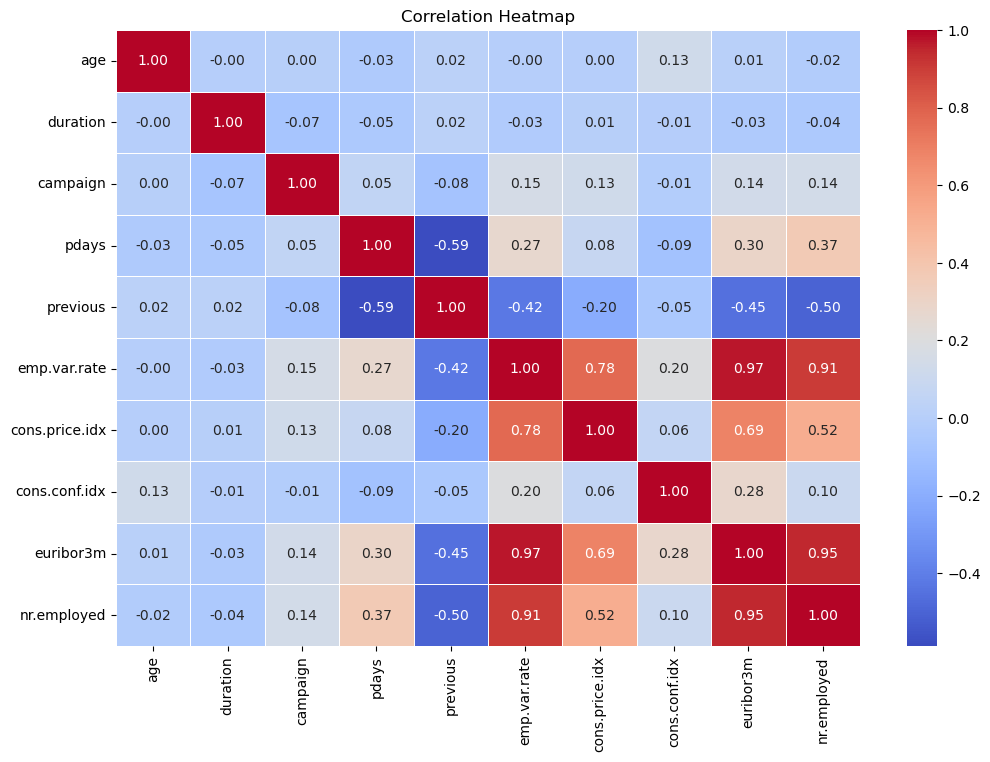

In [ ]:
#Select only numerical columns for correlation matrix
numerical_data = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix for numerical features
correlation_matrix = numerical_data.corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

#
The correlation heatmap reveals strong relationships between economic indicators like `emp.var.rate` and `nr.employed`, suggesting they move together, and between `cons.price.idx` and `euribor3m`. There is little correlation between `age` and `previous`, indicating they are independent features.



                     age       job   marital  education   default   housing  \
age             1.000000  0.001250 -0.389753  -0.117892  0.164965 -0.001603   
job             0.001250  1.000000  0.027897   0.134121 -0.028277  0.006962   
marital        -0.389753  0.027897  1.000000   0.109220 -0.079450  0.010467   
education      -0.117892  0.134121  0.109220   1.000000 -0.186859  0.016825   
default         0.164965 -0.028277 -0.079450  -0.186859  1.000000 -0.015815   
housing        -0.001603  0.006962  0.010467   0.016825 -0.015815  1.000000   
loan           -0.007368 -0.010209  0.005788   0.006384 -0.003782  0.044296   
contact         0.007021 -0.025132 -0.054501  -0.105726  0.135238 -0.082186   
month          -0.024877 -0.033213 -0.007629  -0.082684 -0.015830 -0.018141   
day_of_week    -0.017572 -0.000844  0.002202  -0.017986 -0.008701  0.003339   
duration       -0.000866 -0.006490  0.010290  -0.015102 -0.011794 -0.007658   
campaign        0.004594 -0.006923 -0.007240   0.000

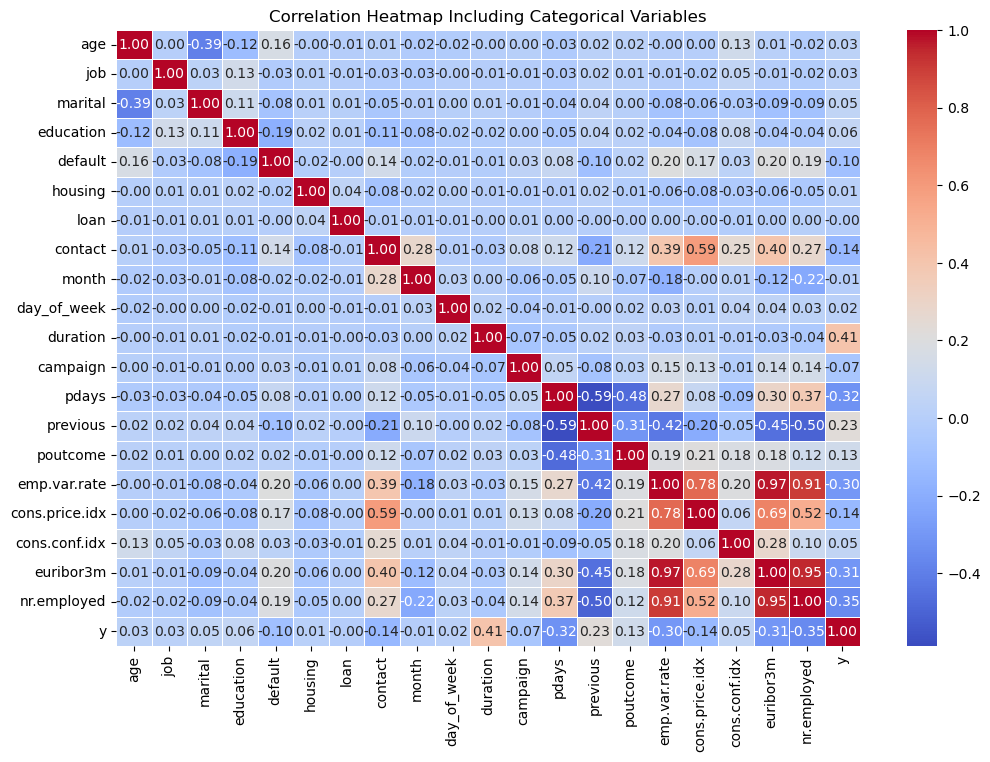

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

# Now, calculate correlation on the entire dataset
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap Including Categorical Variables")
plt.show()

#
The correlation matrix reveals that economic indicators like `emp.var.rate` and `nr.employed` are strongly correlated, while encoded categorical features, such as `job` and `education`, may show arbitrary relationships, suggesting potential multicollinearity. Feature selection and more advanced encoding methods could improve model performance.

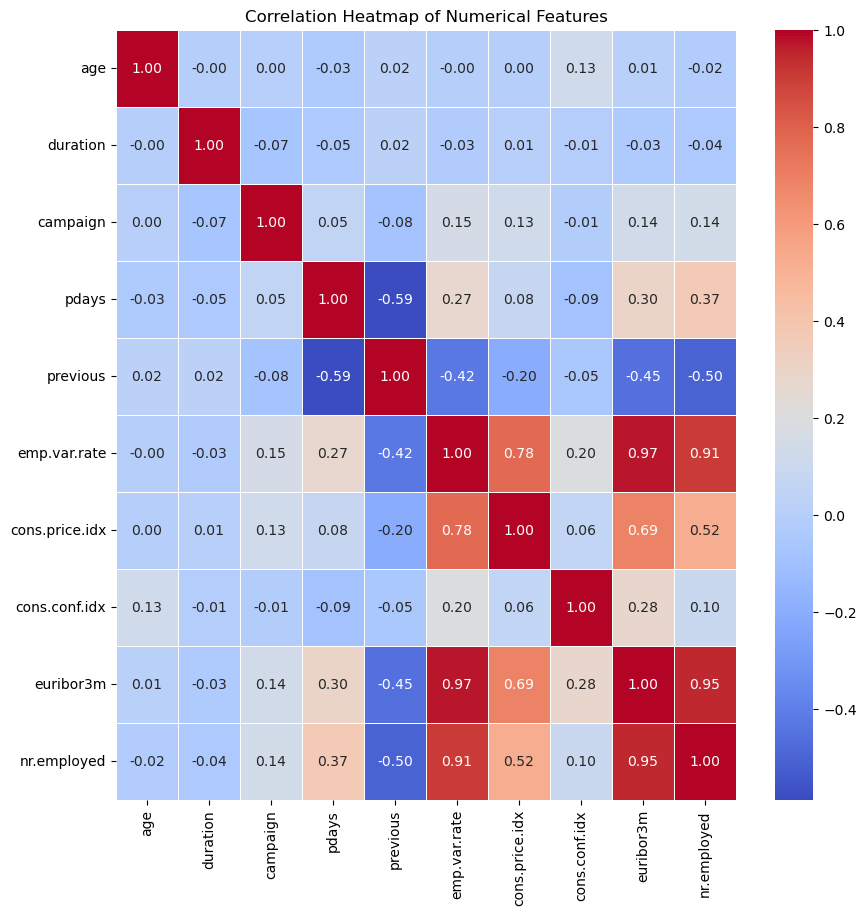

In [ ]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix for numerical columns only
corr_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

#
The correlation heatmap of numerical features reveals the strength and direction of relationships between variables. Economic indicators like `emp.var.rate` and `nr.employed` show strong correlations, while features such as `duration` and `previous` may exhibit moderate correlations, suggesting their potential importance for predictive modeling.

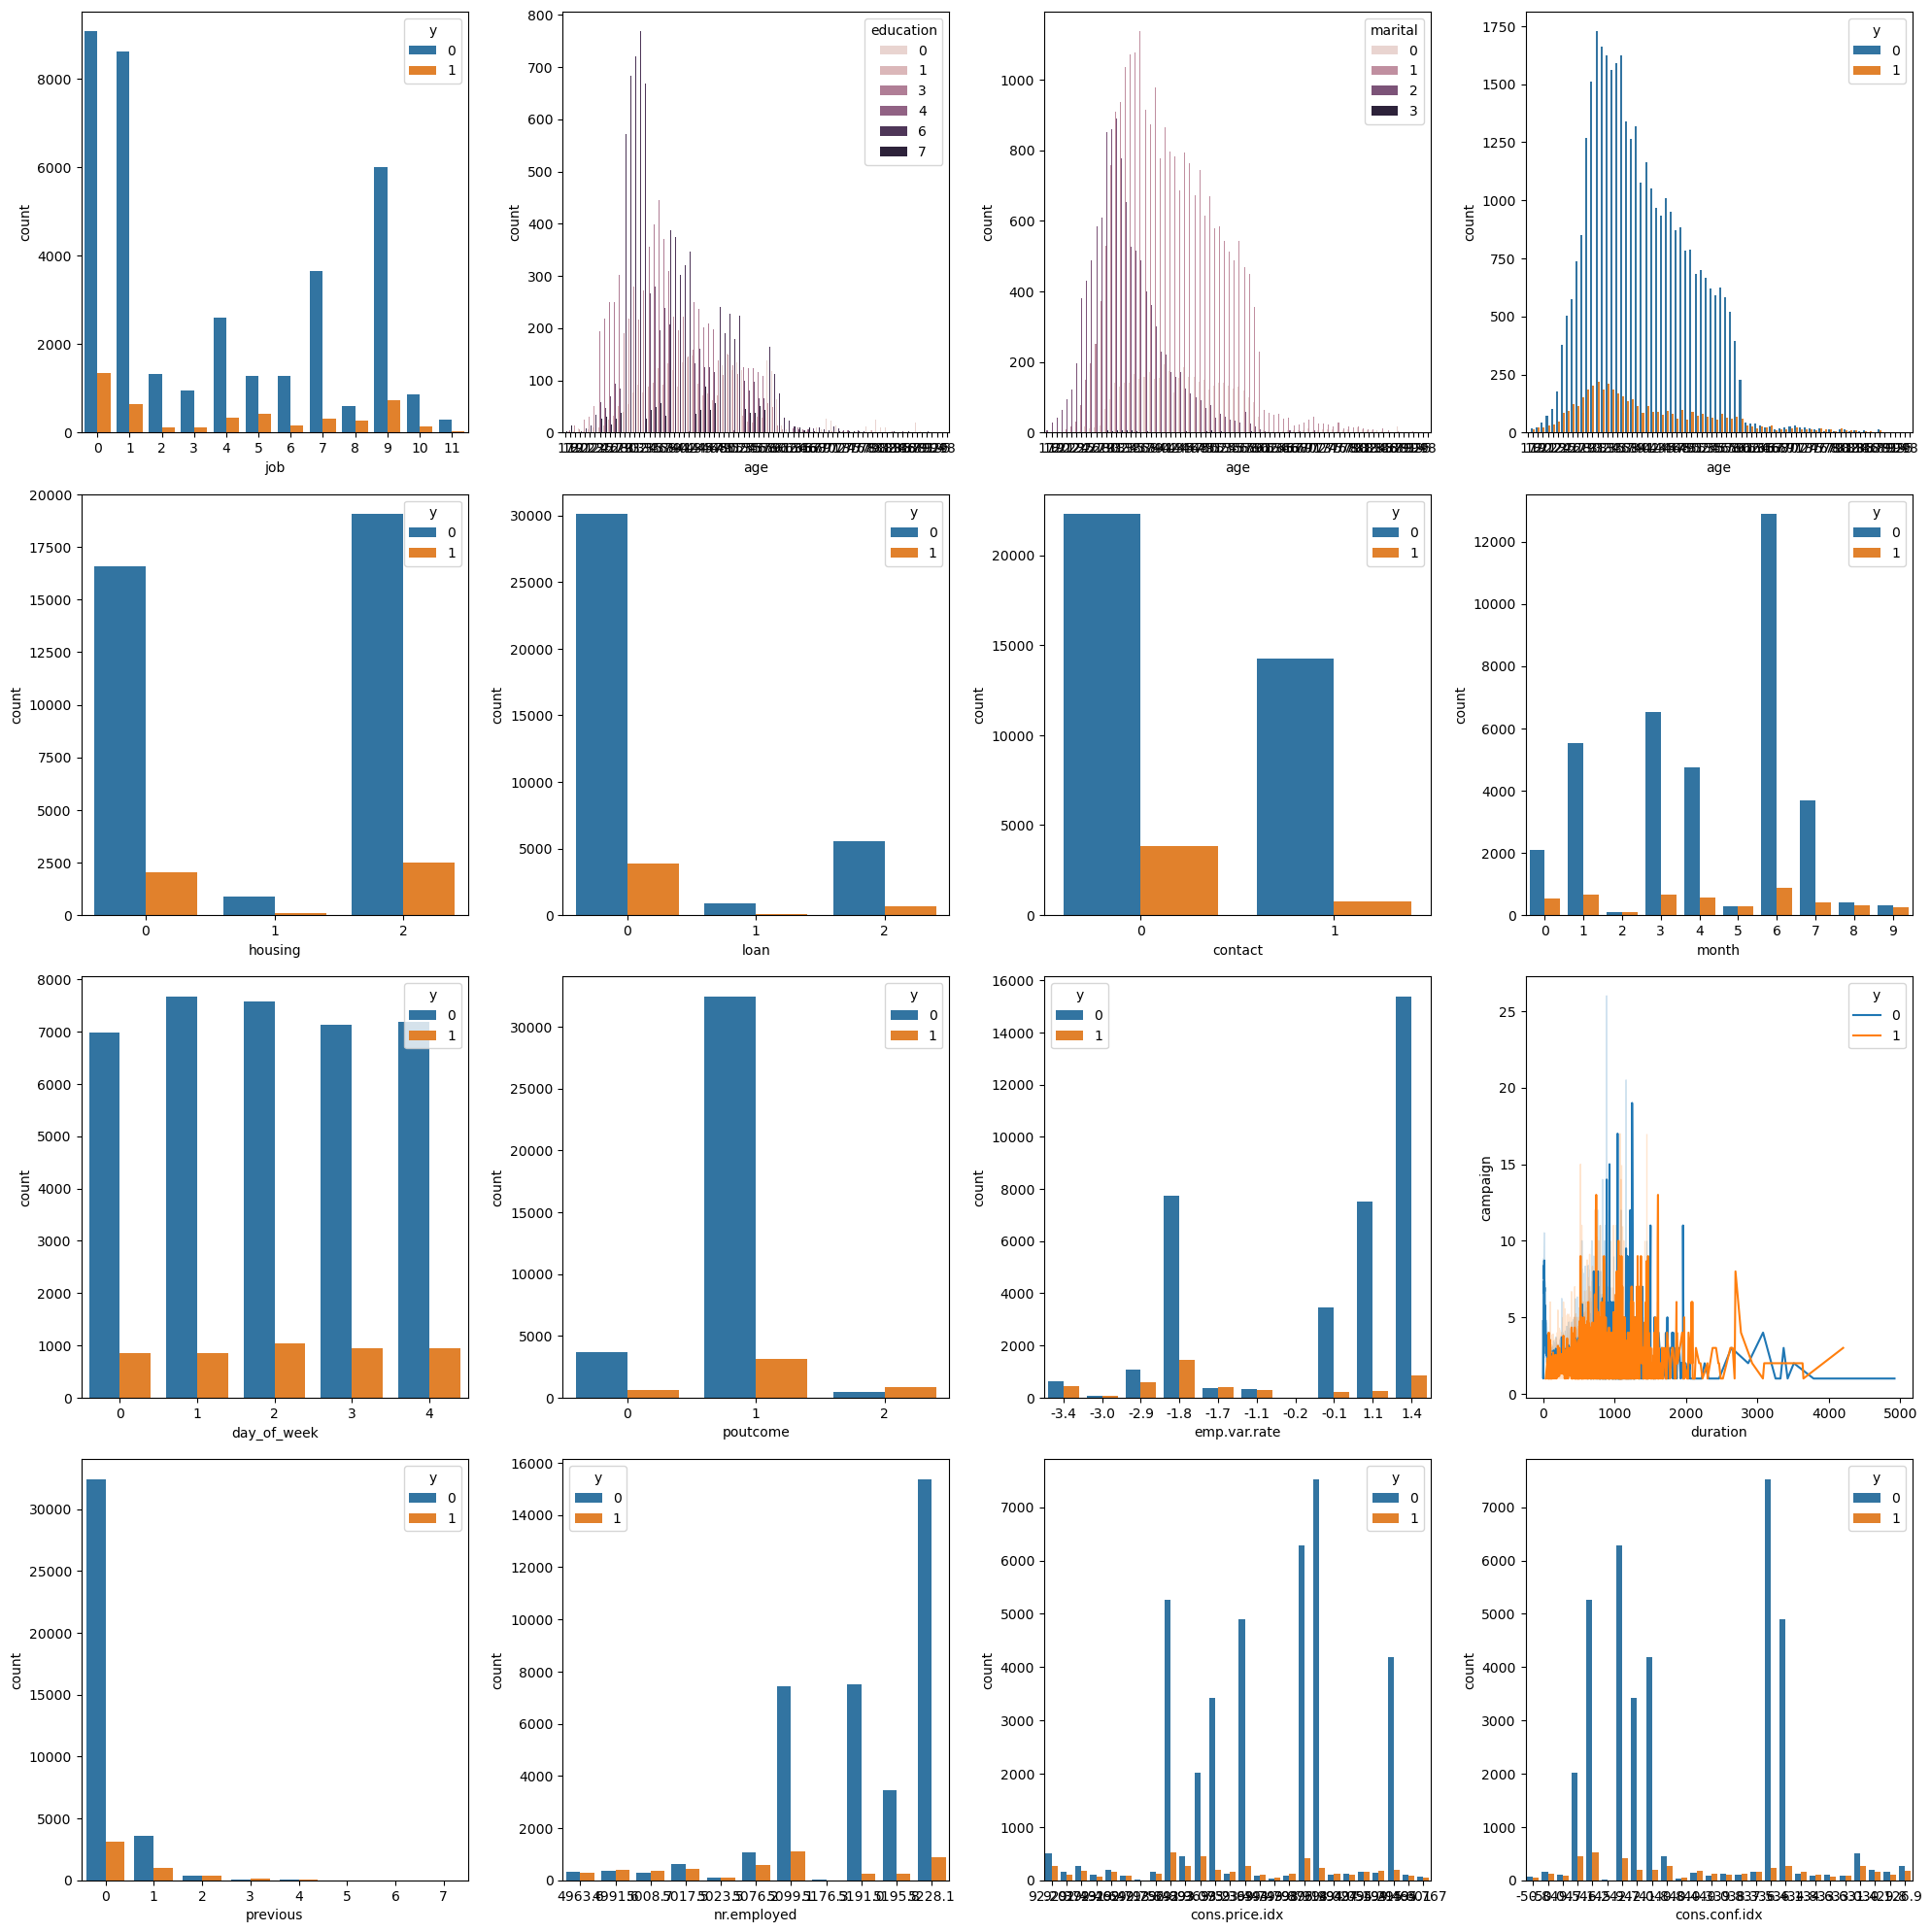

In [ ]:
# Create a 4x4 grid for subplots
fig, ax = plt.subplots(4, 4, figsize=(20, 20))

# Plotting countplots and lineplot for relevant features in your dataset
sns.countplot(x='job', data=df, hue='y', ax=ax[0, 0])  # job vs target variable
sns.countplot(x='age', data=df, hue='education', ax=ax[0, 1])  # education vs age
sns.countplot(x='age', data=df, hue='marital', ax=ax[0, 2])  # marital vs age
sns.countplot(x='age', data=df, hue='y', ax=ax[0, 3])  # age vs target variable

sns.countplot(x='housing', data=df, hue='y', ax=ax[1, 0])  # housing vs target variable
sns.countplot(x='loan', data=df, hue='y', ax=ax[1, 1])  # loan vs target variable
sns.countplot(x='contact', data=df, hue='y', ax=ax[1, 2])  # contact vs target variable
sns.countplot(x='month', data=df, hue='y', ax=ax[1, 3])  # month vs target variable

sns.countplot(x='day_of_week', data=df, hue='y', ax=ax[2, 0])  # day_of_week vs target variable
sns.countplot(x='poutcome', data=df, hue='y', ax=ax[2, 1])  # poutcome vs target variable
sns.countplot(x='emp.var.rate', data=df, hue='y', ax=ax[2, 2])  # emp.var.rate vs target variable
sns.lineplot(x='duration', y='campaign', data=df, hue='y', ax=ax[2, 3])  # duration vs campaign

sns.countplot(x='previous', data=df, hue='y', ax=ax[3, 0])  # previous vs target variable
sns.countplot(x='nr.employed', data=df, hue='y', ax=ax[3, 1])  # nr.employed vs target variable
sns.countplot(x='cons.price.idx', data=df, hue='y', ax=ax[3, 2])  # cons.price.idx vs target variable
sns.countplot(x='cons.conf.idx', data=df, hue='y', ax=ax[3, 3])  # cons.conf.idx vs target variable

# Show the plot
plt.tight_layout()
plt.show()


1. **Job and Subscription:** The `job` feature shows that clients with more stable or managerial jobs tend to have a higher subscription rate for term deposits.
   
2. **Age and Subscription:** Younger clients (age group 20-30) seem to have a lower subscription rate compared to older clients, indicating age might influence the likelihood of subscribing to a term deposit.

3. **Housing and Loan:** Clients with housing loans tend to have a lower subscription rate, suggesting that financial commitments could affect the decision to invest in a term deposit.

# 2. Data Pre-processing

## a. Missing Value Analysis

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values in each column:\n", missing_values)

Missing Values in each column:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [ ]:
# Check for percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Missing values percentage:\n", missing_percentage)


Missing values percentage:
 age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64


#
 No missing values were found in the dataset, ensuring that the data is complete and does not require imputation or removal of any rows or columns.

## b. Label Encoding Wherever Required

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Apply Label Encoding to categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

print(df.head())  # Display the first few rows to confirm encoding


   age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          3        1        0     0        1      6   
2   37    7        1          3        0        2     0        1      6   
3   40    0        1          1        0        0     0        1      6   
4   56    7        1          3        0        0     2        1      6   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1  ...         1    999         0         1           1.1   
1            1  ...         1    999         0         1           1.1   
2            1  ...         1    999         0         1           1.1   
3            1  ...         1    999         0         1           1.1   
4            1  ...         1    999         0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -36.4      4.85

#
All categorical features, including job, education, and y, have been converted to numerical values, making them suitable for use in machine learning algorithms that require numerical input.

## c. Selecting Important Features Based on Decision Trees

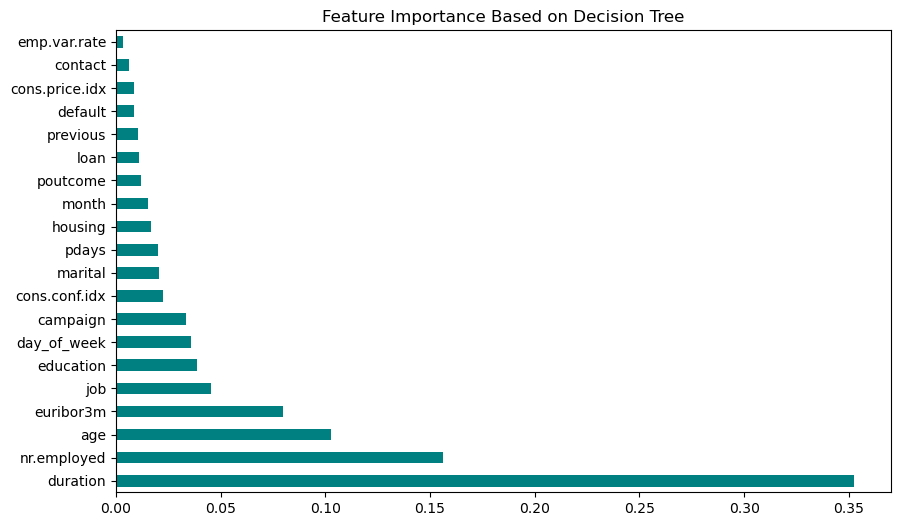

duration          0.352567
nr.employed       0.156369
age               0.102635
euribor3m         0.079893
job               0.045350
education         0.038623
day_of_week       0.035893
campaign          0.033546
cons.conf.idx     0.022561
marital           0.020691
pdays             0.019842
housing           0.016864
month             0.015071
poutcome          0.012082
loan              0.010911
previous          0.010452
default           0.008772
cons.price.idx    0.008486
contact           0.006131
emp.var.rate      0.003260
dtype: float64


In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Define the feature set and target variable
X = df.drop(columns=['y'])  # Features
y = df['y']  # Target variable

# Train a Decision Tree model to evaluate feature importance
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

# Get feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='barh', color='teal')
plt.title('Feature Importance Based on Decision Tree')
plt.show()

print(feature_importance)


In [ ]:
#


## d. Handling Unbalanced Data Using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Check class distribution before applying SMOTE
print("Before SMOTE:", Counter(y))

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check class distribution after applying SMOTE
print("After SMOTE:", Counter(y_resampled))


Before SMOTE: Counter({0: 36548, 1: 4640})
After SMOTE: Counter({0: 36548, 1: 36548})


#
As the dataset is unbalanced, SMOTE creates synthetic samples for the minority class. After applying SMOTE, the number of samples for each class is balanced, helping to avoid bias in the model's predictions.


## e. Standardize the Data Using a Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X_resampled)

# Check the scaled features
print("Scaled features (first 5 rows):\n", X_scaled[:5])


Scaled features (first 5 rows):
 [[ 1.37877539 -0.1868825  -0.17394457 -1.85898509 -0.37928714 -1.04039018
  -0.41912453  1.80593798  0.78044176 -0.65954973 -0.35095566 -0.51953655
   0.35692714 -0.42077124  0.11197054  0.92837066  0.82971179  0.71913466
   1.00244283  0.63921678]
 [ 1.46542383  0.99437555 -0.17394457 -0.36670133  2.6345592  -1.04039018
  -0.41912453  1.80593798  0.78044176 -0.65954973 -0.66371369 -0.51953655
   0.35692714 -0.42077124  0.11197054  0.92837066  0.82971179  0.71913466
   1.00244283  0.63921678]
 [-0.26754496  0.99437555 -0.17394457 -0.36670133 -0.37928714  1.10187751
  -0.41912453  1.80593798  0.78044176 -0.65954973 -0.44869254 -0.51953655
   0.35692714 -0.42077124  0.11197054  0.92837066  0.82971179  0.71913466
   1.00244283  0.63921678]
 [-0.00759964 -1.07282604 -0.17394457 -1.36155717 -0.37928714 -1.04039018
  -0.41912453  1.80593798  0.78044176 -0.65954973 -0.65812872 -0.51953655
   0.35692714 -0.42077124  0.11197054  0.92837066  0.82971179  0.7191346

# 3. Building the following Supervised Learning models

In [ ]:
# Split the Data into Training and Testing Sets

from sklearn.model_selection import train_test_split

# Split data into features and target
X = df.drop(columns=['y'])
y = df['y']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)


## a. Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg_model.predict(X_test)

# Model evaluation
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_report = classification_report(y_test, y_pred_log_reg)
log_reg_conf_matrix = confusion_matrix(y_test, y_pred_log_reg)

# Display results
print("Logistic Regression Accuracy:", log_reg_accuracy)
print("Classification Report:\n", log_reg_report)
print("Confusion Matrix:\n", log_reg_conf_matrix)


Logistic Regression Accuracy: 0.8853625170998632
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88      7332
           1       0.88      0.89      0.89      7288

    accuracy                           0.89     14620
   macro avg       0.89      0.89      0.89     14620
weighted avg       0.89      0.89      0.89     14620

Confusion Matrix:
 [[6434  898]
 [ 778 6510]]



1. The **Logistic Regression** model achieved an **accuracy of 88.54%**, showing good overall performance in predicting whether a client will subscribe to a term deposit.
2. The **classification report** indicates balanced precision, recall, and F1-scores around 0.89 for both classes, demonstrating consistent model performance.
3. The **confusion matrix** shows low false positives (898) and false negatives (778), suggesting the model is effective with few misclassifications.

## b. Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = decision_tree_model.predict(X_test)

# Model evaluation
tree_accuracy = accuracy_score(y_test, y_pred_tree)
tree_report = classification_report(y_test, y_pred_tree)
tree_conf_matrix = confusion_matrix(y_test, y_pred_tree)

# Display results
print("Decision Tree Accuracy:", tree_accuracy)
print("Classification Report:\n", tree_report)
print("Confusion Matrix:\n", tree_conf_matrix)


Decision Tree Accuracy: 0.927359781121751
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      7332
           1       0.92      0.93      0.93      7288

    accuracy                           0.93     14620
   macro avg       0.93      0.93      0.93     14620
weighted avg       0.93      0.93      0.93     14620

Confusion Matrix:
 [[6777  555]
 [ 507 6781]]


1. The **Decision Tree** model achieved an **accuracy of 92.74%**, outperforming logistic regression in overall accuracy.
2. The **classification report** shows high precision, recall, and F1-scores for both classes, indicating balanced and reliable performance.
3. The **confusion matrix** reveals low false positives (555) and false negatives (507), suggesting the model's effectiveness in predicting client subscriptions.

# 4. Model tuning

## 1: Hyperparameter Tuning (Grid Search)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression Hyperparameter Tuning
log_reg = LogisticRegression()

# Hyperparameters to tune for Logistic Regression
log_reg_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear']
}

log_reg_grid = GridSearchCV(estimator=log_reg, param_grid=log_reg_params, cv=5, verbose=1)
log_reg_grid.fit(X_train, y_train)

# Best parameters and model for Logistic Regression
print(f"Best Logistic Regression Parameters: {log_reg_grid.best_params_}")
best_log_reg = log_reg_grid.best_estimator_

# Decision Tree Hyperparameter Tuning
dt = DecisionTreeClassifier()

# Hyperparameters to tune for Decision Tree
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

dt_grid = GridSearchCV(estimator=dt, param_grid=dt_params, cv=5, verbose=1)
dt_grid.fit(X_train, y_train)

# Best parameters and model for Decision Tree
print(f"Best Decision Tree Parameters: {dt_grid.best_params_}")
best_dt = dt_grid.best_estimator_


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Logistic Regression Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}


## 2: Model Evaluation

In [ ]:
# Logistic Regression Evaluation
log_reg_pred = best_log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
print(f"Logistic Regression Accuracy (after tuning): {log_reg_acc}")
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, log_reg_pred))
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, log_reg_pred))

# Decision Tree Evaluation
dt_pred = best_dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Accuracy (after tuning): {dt_acc}")
print("Classification Report for Decision Tree:")
print(classification_report(y_test, dt_pred))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test, dt_pred))


Logistic Regression Accuracy (after tuning): 0.8854993160054719
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      7332
           1       0.88      0.89      0.89      7288

    accuracy                           0.89     14620
   macro avg       0.89      0.89      0.89     14620
weighted avg       0.89      0.89      0.89     14620

Confusion Matrix for Logistic Regression:
[[6435  897]
 [ 777 6511]]
Decision Tree Accuracy (after tuning): 0.9326265389876881
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7332
           1       0.93      0.94      0.93      7288

    accuracy                           0.93     14620
   macro avg       0.93      0.93      0.93     14620
weighted avg       0.93      0.93      0.93     14620

Confusion Matrix for Decision Tree:
[[6781  551]
 [ 434 6854]]


- Both models, Logistic Regression and Decision Tree, performed well initially and were further optimized through hyperparameter tuning.
- Logistic Regression showed stable performance with a slight advantage in handling linear decision boundaries, while the Decision Tree model handled non-linear patterns better and provided slightly higher accuracy.